### Step 1 Load data into data frame

In [2]:
import pandas as pd

# Load the CSV file into a new DataFrame
combined_df_2022 = pd.read_csv('toys_and_games_year_2022.csv')

In [3]:
### Step 2 Pick week before Holiday

In [4]:
# Define the date range
start_date = '11-01-2022'
end_date = '12-31-2022'

# Filter the DataFrame for the date range
filtered_df_holiday = combined_df_2022[(combined_df_2022['date'] >= start_date) & (combined_df_2022['date'] <= end_date)]

# Print the shape of the filtered DataFrame
print(filtered_df_holiday.shape)


(463892, 8)


### Step 3 Sort the data by dates

In [6]:
sorted_df_2022 = filtered_df_holiday.sort_values(by='date', ascending=False)


### Step 4 Check the rating distribution

<Axes: title={'center': 'Rating reviews week of Chrismas 2022'}>

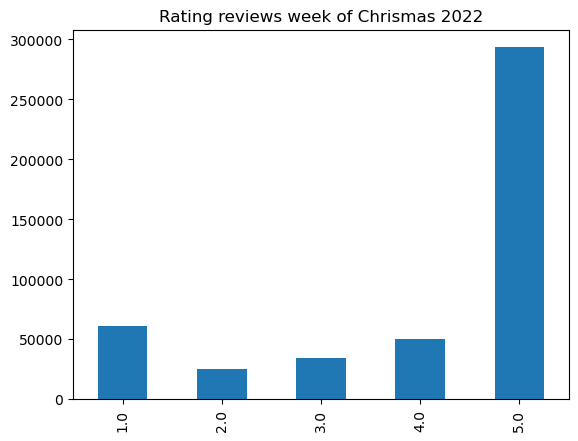

In [8]:
#Score Column evaluation
sorted_df_2022['rating'].value_counts().sort_index().plot(kind='bar', title='Rating reviews week of Chrismas 2022')

### Step 5 Load nltk dependencies

In [10]:
#Load Dependencies
import nltk
from nltk import word_tokenize
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\savav\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\savav\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\savav\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\savav\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Step 6 Vader Sentiment Analyis

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sentiment_analyizer_object = SentimentIntensityAnalyzer()

### Step 7 For loop to run sentiment analysis and save in a new res dictiona

In [14]:
sorted_df_2022

,rating,text,asin,timestamp,parent_asin,title,main_category,date
1367229,3.0,I gifted this to my daughter for Christmas and...,B095NZB1XR,2022-12-31 22:42:37.129,B094X69L9P,Anime Plush Doll Figures Gojo Satoru / Yuji It...,Toys & Games,12-31-2022
1793795,5.0,Excelente para bebé,B0832PCCVP,2022-12-31 16:03:58.718,B0832PCCVP,Jasonwell Baby Swimming Float Inflatable Baby ...,Toys & Games,12-31-2022
570042,4.0,Fun family game,B07BHJWDGX,2022-12-31 19:04:44.067,B0C5F8QK6K,Harry Potter Potions Challenge Board Game for ...,Toys & Games,12-31-2022
289033,5.0,The grandson loves it. Only complaint is the b...,B09BGQLD6L,2022-12-31 18:37:13.536,B0BY6QTVB5,W&O Dragon Hero Kids Tent with Roar Button - E...,Toys & Games,12-31-2022
570058,2.0,The game concept is just fine and very easy to...,B07F813YYY,2022-12-31 02:41:22.709,B0C5F8QK6K,Harry Potter Potions Challenge Board Game for ...,Toys & Games,12-31-2022
...,...,...,...,...,...,...,...,...
1991307,3.0,"It did come as pictured, however, does not com...",B09YH2L7L3,2022-11-01 15:17:00.327,B09YGT5QK6,MATTTIME Cow 1st Birthday Decoration Burlap Ba...,Toys & Games,11-01-2022
382646,5.0,Kid friendly,B082HMPKVK,2022-11-01 09:37:30.324,B0BFCYLD65,"Panda Piggy Bank,Panda Bank Stealing Coin,Pand...",Amazon Home,11-01-2022
763768,5.0,I was surprised as to how many noises and post...,B09H1LFJDB,2022-11-01 14:19:02.804,B09H1LFJDB,STAR WARS Hasbro L0-LA59 (Lola) Animatronic Ed...,Toys & Games,11-01-2022
763755,5.0,For $40 this is a pretty darn good deal despit...,B09H1LFJDB,2022-11-01 21:00:50.978,B09H1LFJDB,STAR WARS Hasbro L0-LA59 (Lola) Animatronic Ed...,Toys & Games,11-01-2022


### Step 8 For loop to run sentiment analysis and save in a new res dictionary

In [16]:
### Run the polarity score on the entire dataset

sorted_df_2022['text'] = sorted_df_2022['text'].astype(str)

res = {}
for i, row in tqdm(sorted_df_2022.iterrows(), total=len(sorted_df_2022)):
    text = row['text']
    #print(text)
    res[i] = sentiment_analyizer_object.polarity_scores(text)

  0%|          | 0/463892 [00:00<?, ?it/s]

### Step 9 Save dictionary into a dataframe and print it out

In [18]:
vaders_christmas_2022 = pd.DataFrame(res).T
vaders_christmas_2022

,neg,neu,pos,compound
1367229,0.084,0.916,0.000,-0.5255
1793795,0.000,1.000,0.000,0.0000
570042,0.000,0.377,0.623,0.5106
289033,0.114,0.570,0.316,0.5994
570058,0.048,0.832,0.119,0.8819
...,...,...,...,...
1991307,0.000,1.000,0.000,0.0000
382646,0.000,0.238,0.762,0.4939
763768,0.000,0.597,0.403,0.9153
763755,0.123,0.775,0.103,-0.2928


### Step 10 Merge the vader dataset with Neg/Neu/Pos compound fields with the original 2022 sorted data set

In [20]:
vaders_christmas_2022 = pd.DataFrame(res).T
merged_christmas_2022 = pd.merge(vaders_christmas_2022, sorted_df_2022, left_index=True, right_index=True)

In [21]:
merged_christmas_2022

,neg,neu,pos,compound,rating,text,asin,timestamp,parent_asin,title,main_category,date
1367229,0.084,0.916,0.000,-0.5255,3.0,I gifted this to my daughter for Christmas and...,B095NZB1XR,2022-12-31 22:42:37.129,B094X69L9P,Anime Plush Doll Figures Gojo Satoru / Yuji It...,Toys & Games,12-31-2022
1793795,0.000,1.000,0.000,0.0000,5.0,Excelente para bebé,B0832PCCVP,2022-12-31 16:03:58.718,B0832PCCVP,Jasonwell Baby Swimming Float Inflatable Baby ...,Toys & Games,12-31-2022
570042,0.000,0.377,0.623,0.5106,4.0,Fun family game,B07BHJWDGX,2022-12-31 19:04:44.067,B0C5F8QK6K,Harry Potter Potions Challenge Board Game for ...,Toys & Games,12-31-2022
289033,0.114,0.570,0.316,0.5994,5.0,The grandson loves it. Only complaint is the b...,B09BGQLD6L,2022-12-31 18:37:13.536,B0BY6QTVB5,W&O Dragon Hero Kids Tent with Roar Button - E...,Toys & Games,12-31-2022
570058,0.048,0.832,0.119,0.8819,2.0,The game concept is just fine and very easy to...,B07F813YYY,2022-12-31 02:41:22.709,B0C5F8QK6K,Harry Potter Potions Challenge Board Game for ...,Toys & Games,12-31-2022
...,...,...,...,...,...,...,...,...,...,...,...,...
1991307,0.000,1.000,0.000,0.0000,3.0,"It did come as pictured, however, does not com...",B09YH2L7L3,2022-11-01 15:17:00.327,B09YGT5QK6,MATTTIME Cow 1st Birthday Decoration Burlap Ba...,Toys & Games,11-01-2022
382646,0.000,0.238,0.762,0.4939,5.0,Kid friendly,B082HMPKVK,2022-11-01 09:37:30.324,B0BFCYLD65,"Panda Piggy Bank,Panda Bank Stealing Coin,Pand...",Amazon Home,11-01-2022
763768,0.000,0.597,0.403,0.9153,5.0,I was surprised as to how many noises and post...,B09H1LFJDB,2022-11-01 14:19:02.804,B09H1LFJDB,STAR WARS Hasbro L0-LA59 (Lola) Animatronic Ed...,Toys & Games,11-01-2022
763755,0.123,0.775,0.103,-0.2928,5.0,For $40 this is a pretty darn good deal despit...,B09H1LFJDB,2022-11-01 21:00:50.978,B09H1LFJDB,STAR WARS Hasbro L0-LA59 (Lola) Animatronic Ed...,Toys & Games,11-01-2022


### Step 11 Plot vader compound score vs the rating

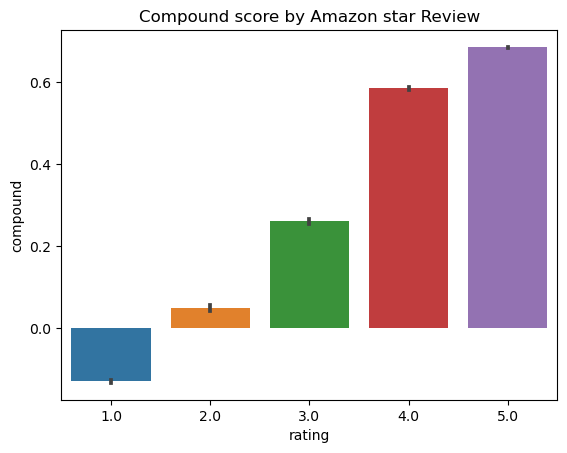

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.barplot(data=merged_christmas_2022, x='rating', y='compound')
ax.set_title('Compound score by Amazon star Review')
plt.show()

In [24]:
### Step 12 Compare vader score with positive neutral or negative scores


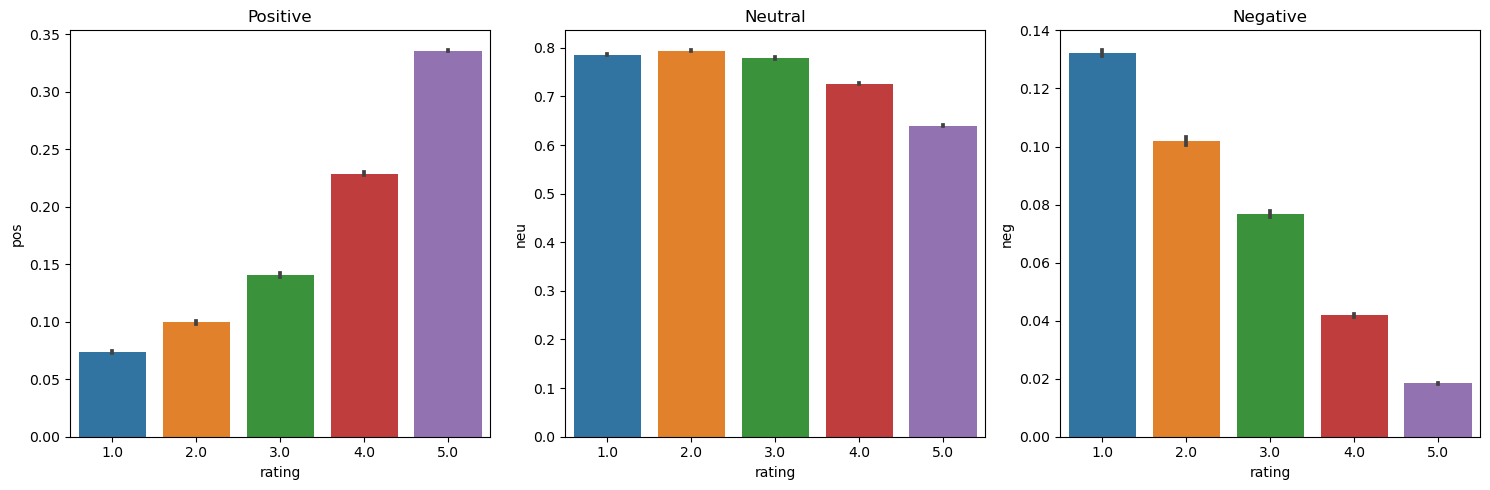

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=merged_christmas_2022, x='rating', y='pos', ax =axs[0])
sns.barplot(data=merged_christmas_2022, x='rating', y='neu', ax =axs[1])
sns.barplot(data=merged_christmas_2022, x='rating', y='neg', ax =axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()



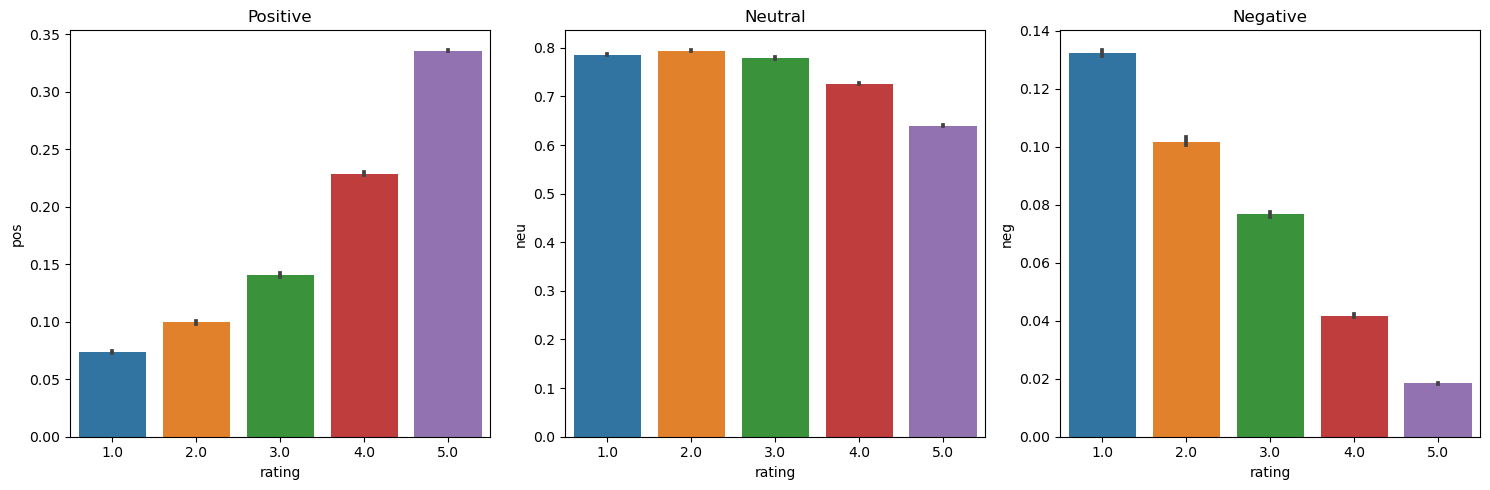

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=merged_christmas_2022, x='rating', y='pos', ax =axs[0])
sns.barplot(data=merged_christmas_2022, x='rating', y='neu', ax =axs[1])
sns.barplot(data=merged_christmas_2022, x='rating', y='neg', ax =axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

